# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context:
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses.

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan.

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands)
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

#### Loading data

In [ ]:
import requests
from io import StringIO
import pandas as pd # Import pandas here

# import library for preparing data
from sklearn.model_selection import train_test_split

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


**Checking the data information**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

In [ ]:
#Correcting datatype for Dependents form object to numerical
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


Checking for Missing Values in each column

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Treating Missing values,
- Replace the with mode and median values
- Missing values formed less than 20% of records

In [ ]:
#Categorical imputation
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Numerical imputation
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

Rechecking datatype after addressing missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

**Checking for unique values  in a column**

In [ ]:
data.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


In [ ]:
#drop loan_id becuase it is a unique identifier
data=data.drop(['Loan_ID'],axis=1)

In [ ]:
#defining variables into categorical and numerical

#Creating numerical columns
num_cols=['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Dependents']

#Creating categorical variables
cat_cols= ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Credit_History']

In [ ]:
#Checking summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.0,360.0,360.00,480.0
Dependents,614.0,0.744300,1.009623,0.0,0.0,0.0,1.00,3.0


**Statistical Summary of Numerical Variables**

- ApplicantIncome: It has wide variation with a few high-income outliers and average income is moderately high.

- CoapplicantIncome: Many applicants have zero coapplicant income and variation is moderate.

- LoanAmount: Most of the applicants request smaller loans. Distribution slightly right-skewed.

- Loan_Amount_Term: Majority of loans are for 360 months which shows consistency in repayment terms.

- Dependents: Most applicants have 0–1 dependent, indicating smaller family sizes.

- Overall:
Income variables show high variability, while loan term and dependents are more uniform. These summaries highlight income diversity and stable loan structures among applicants.



In [ ]:
#Summarzing Categorical Variables
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64
****************************************
Married
Yes    0.653094
No     0.346906
Name: proportion, dtype: float64
****************************************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
****************************************
Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64
****************************************
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64
****************************************
Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64
****************************************
Credit_History
1.0    0.855049
0.0    0.144951
Name: proportion, dtype: float64
****************************************


**Interpretation of Categorical Variable Summary**
- The dataset shows that 82% of applicants are male and 18% are female, indicating a male-dominated applicant base.

- Around 65% of applicants are married, suggesting most applicants apply jointly with a spouse.

- Nearly 79% of applicants are graduates, showing that education level is generally high among loan seekers.

- Only 13% of applicants are self-employed, while the remaining 87% work in salaried jobs.

- The property area distribution is relatively even, with 39% in semi-urban, 32% in urban, and 29% in rural regions.

- The loan approval rate (Loan_Status) is about 68% approved and 32% not approved, showing a moderately imbalanced target variable.

- Credit history appears to strongly influence approval likelihood — 85% of applicants have a positive credit history, while 15% do not.

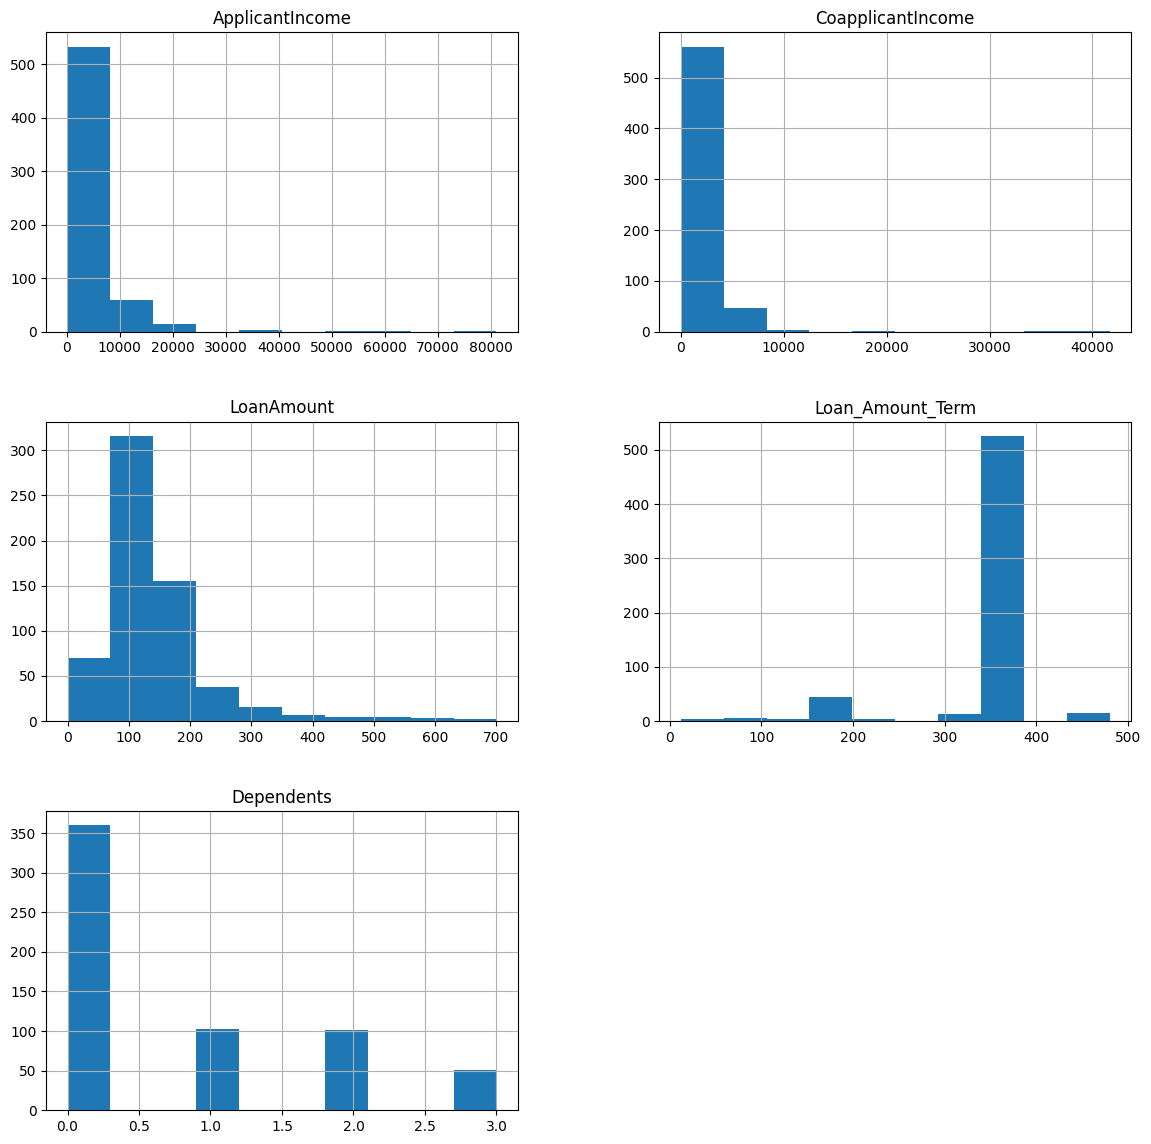

In [ ]:
#Histograms of all quantitative variables
data[num_cols].hist(figsize=(14,14))
plt.show()

**Observations**:
- **ApplicantIncome**:
The distribution of applicant income is highly right-skewed, meaning most applicants have relatively low income levels, while a few applicants earn significantly higher incomes. This indicates a small number of outliers with very high income.

- **CoapplicantIncome**:
Coapplicant income is also strongly right-skewed, with the majority of coapplicants earning little to no income. This suggests that in many loan applications, the primary applicant contributes the bulk of the total household income.

- **LoanAmount**:
The loan amount distribution is moderately right-skewed, showing that most loan requests are for smaller to medium amounts, while a few applicants request substantially larger loans. This reflects a typical borrowing pattern where smaller loans are more common.

- **Loan_Amount_Term**:
The loan term distribution is highly concentrated around 360 months (30 years), indicating that most applicants prefer long-term repayment plans. Very few loans have shorter durations, such as 120 or 240 months.

- **Dependents**:
The number of dependents is right-skewed, with most applicants reporting zero dependents. A smaller proportion has one or two dependents, and very few have three or more. This suggests that the majority of loan applicants are single or have smaller families.

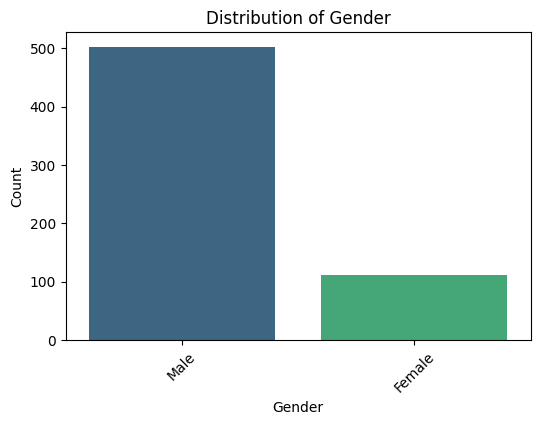

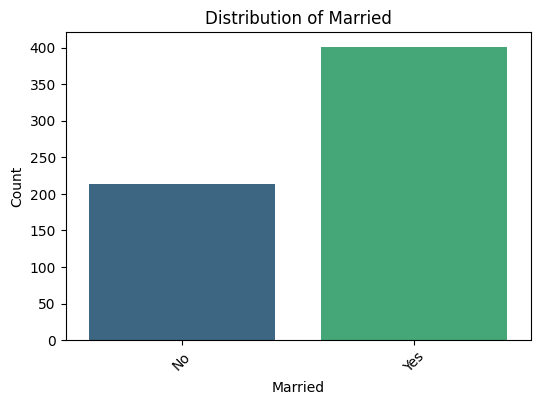

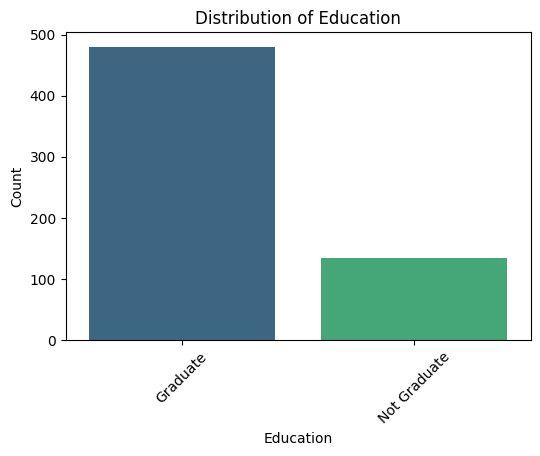

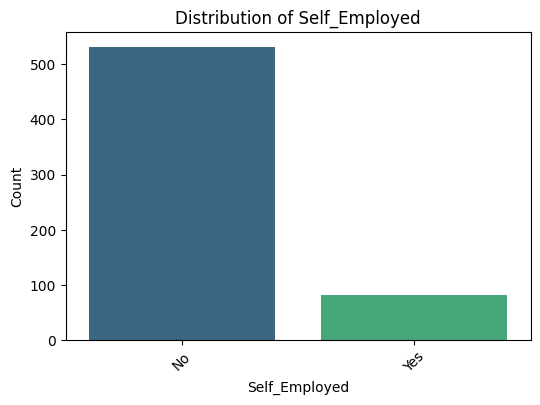

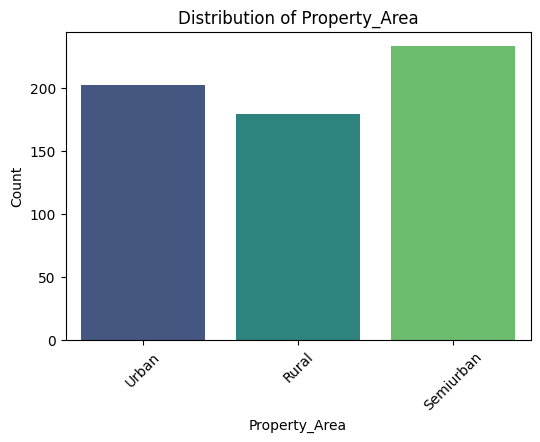

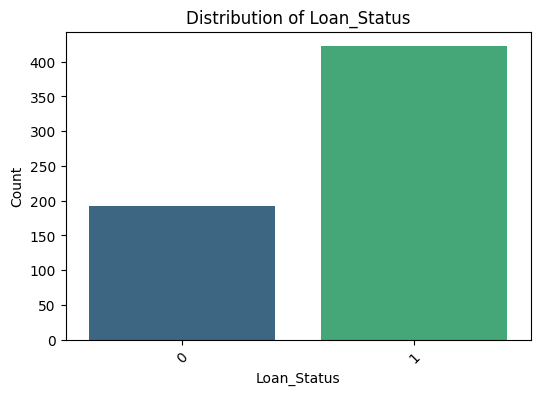

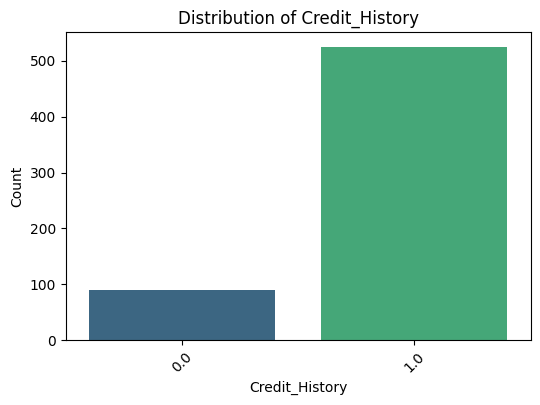

In [ ]:
# Bar charts for each categorical variable
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


#Categorical Variables vs Loan_Status

The bar charts help visualize the frequency distribution of each categorical variable in the dataset. Most applicants are male and married, indicating joint financial stability. A large portion of applicants are graduates, suggesting that education level may influence loan eligibility. Few applicants are self-employed which shows that salaried individuals form the majority. In terms of property area, most loans are from urban and semi-urban regions, while rural areas have fewer applicants. The credit history chart shows that most applicants have a positive credit record, which likely contributes to higher loan approval rates. Overall, these visual insights highlight demographic and financial patterns that may affect loan approval decisions.

Bivariate and Multivariate analysis: we want to check how does loan_status relate with other categorical variables

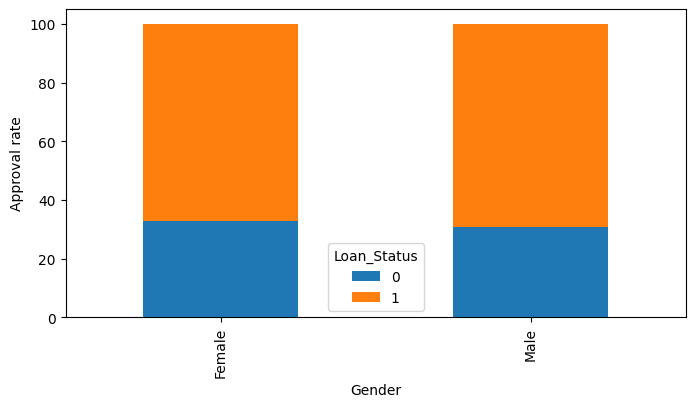

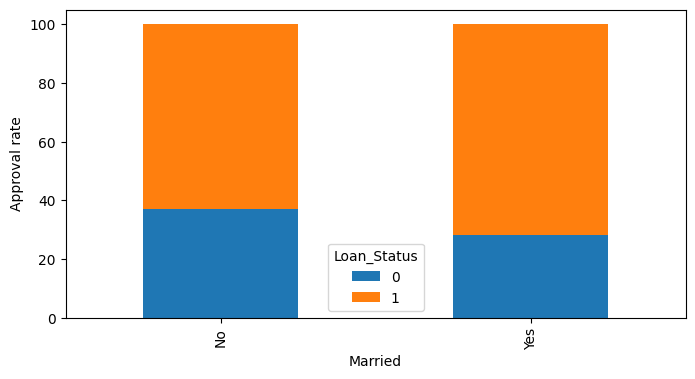

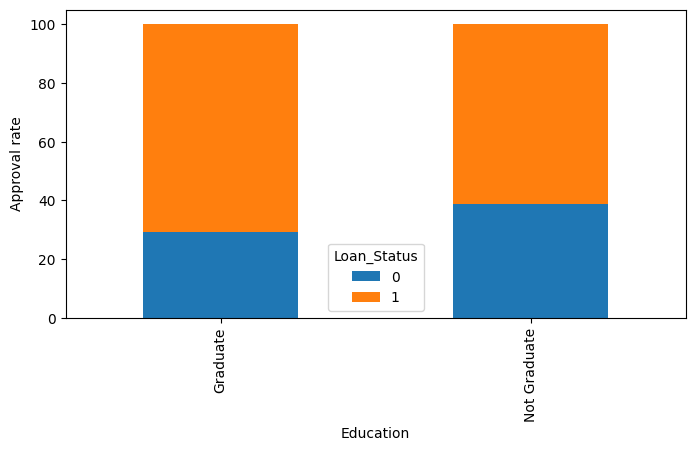

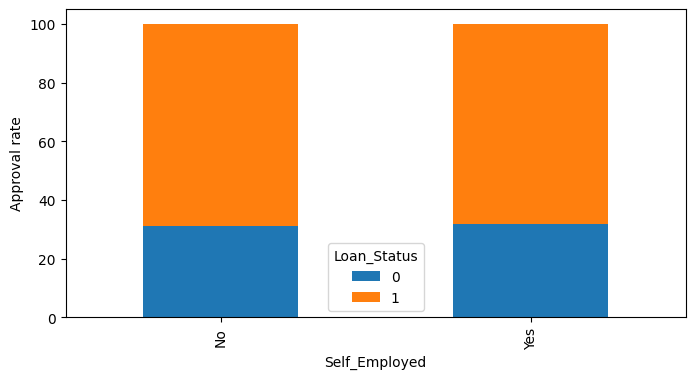

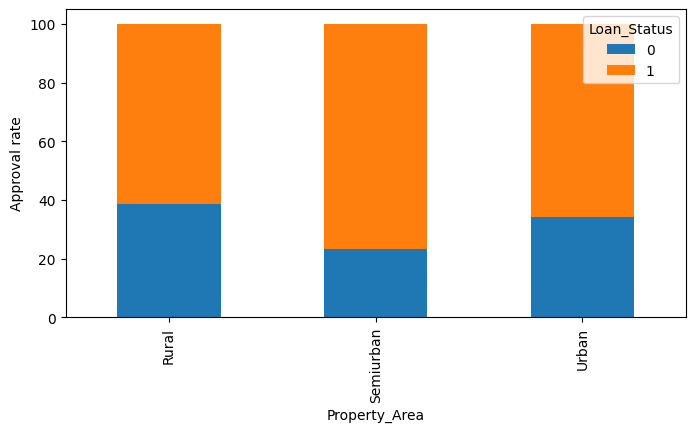

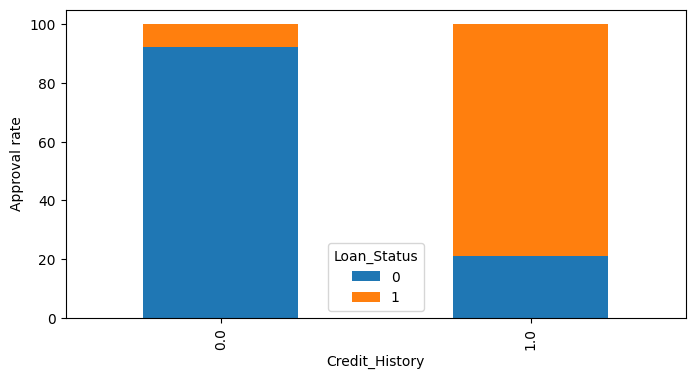

In [ ]:
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(data[i],data['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Approval rate')

**From the obseravtions in the  bivariate analysis**:
Customers who have prior credit history receive higher approval rating than those without any credit history.

Clients with semi urban properties also receive the highest loan approvals

Self-employed clients also receive high approvals than their counterpart

Graduates receive higher approvals than non-graduates

Married clients also receive higher approvals than non-married customers

# Numerical variables vs Loan_Status

In [ ]:
#Mean of numerical variables grouped by loan status
data.groupby(['Loan_Status'])[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Dependents
Loan_Status,,,,,
0,5446.078125,1877.807292,142.557292,344.56250,0.729167
1,5384.068720,1504.516398,140.533175,341.43128,0.751185


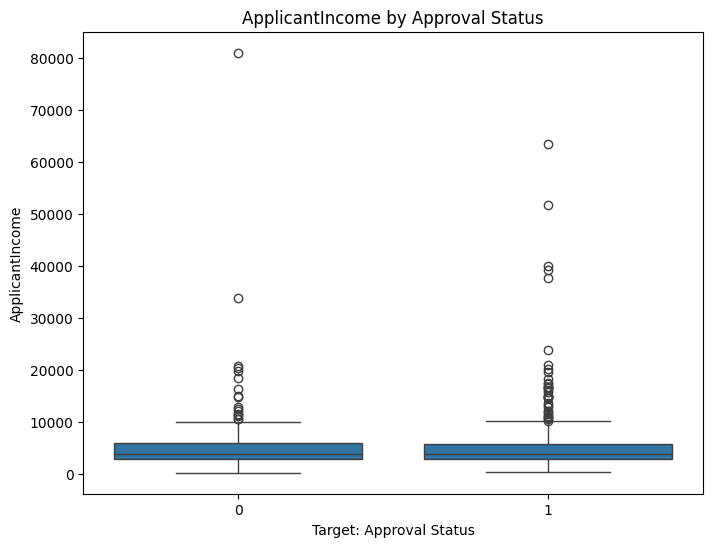

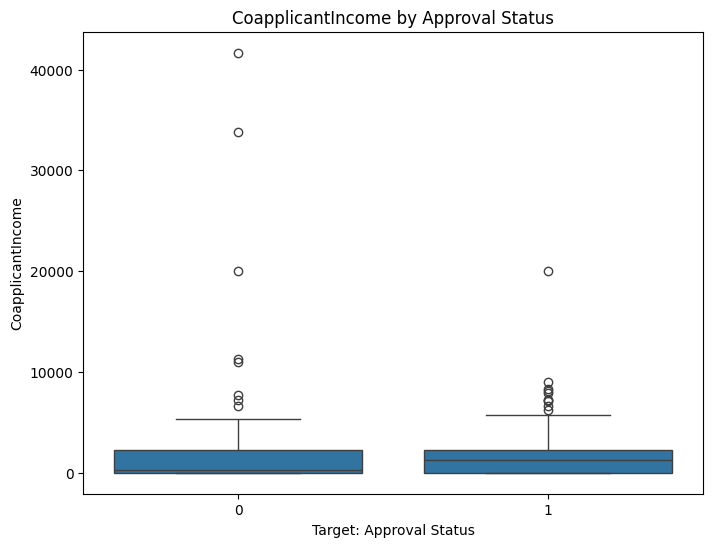

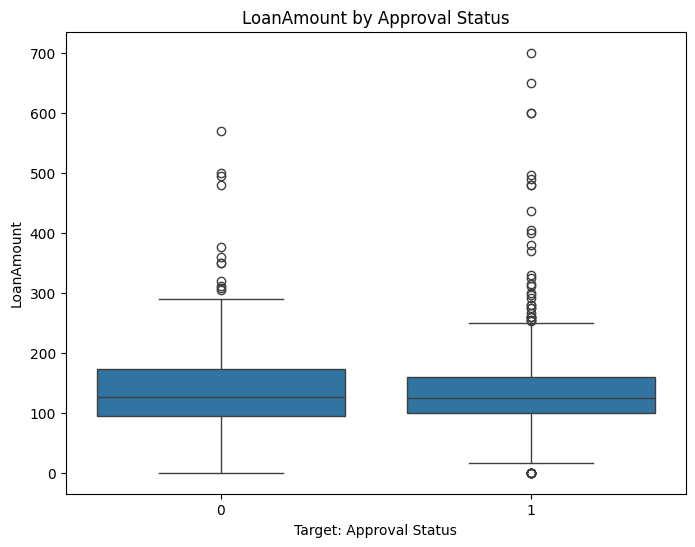

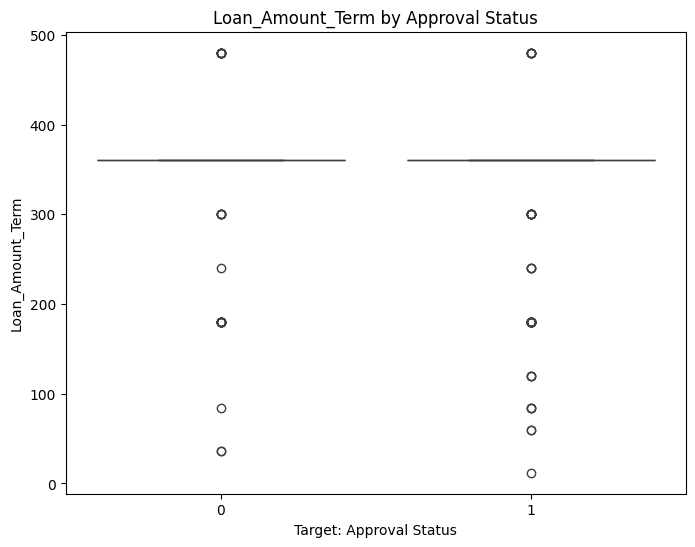

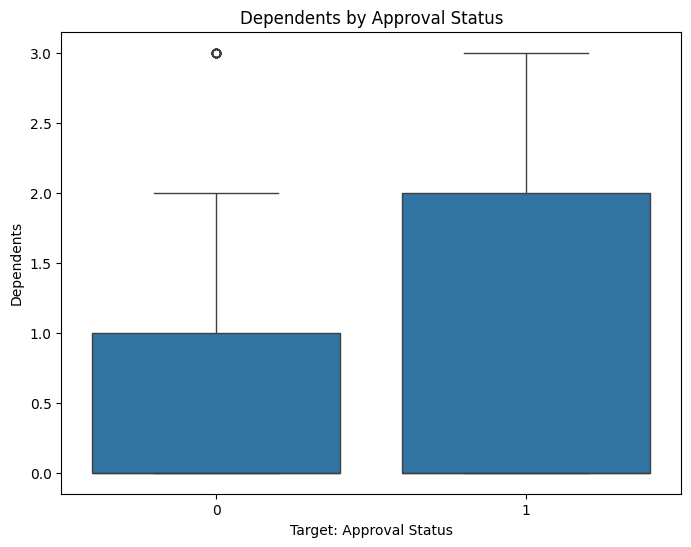

In [ ]:
# List of feature variables for y-axis
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']

# Create boxplots using a for loop
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Loan_Status', y=feature, data=data)
    plt.xlabel('Target: Approval Status')
    plt.ylabel(feature)
    plt.title(f'{feature} by Approval Status')
    plt.show()

**Observations**

Generally, Loan approvals appear less influenced by income or loan size, and more likely tied to other factors such as credit history, employment type, marital status.

- ApplicantIncome: Higher for denied loans (5703) than approved (5166), suggesting income alone doesn’t drive approval.

- CoapplicantIncome: Also higher for denied loans (1728 vs. 1492), reinforcing that total income isn’t the key factor.

- LoanAmount: Slightly larger for denied loans (144) than approved (137), indicating smaller loan requests may be more likely to succeed.

- Loan_Amount_Term: Nearly identical across both groups (342), showing term length has minimal influence.

- Dependents: Slightly higher average among approved loans (0.79 vs. 0.75), suggesting a weak positive association.

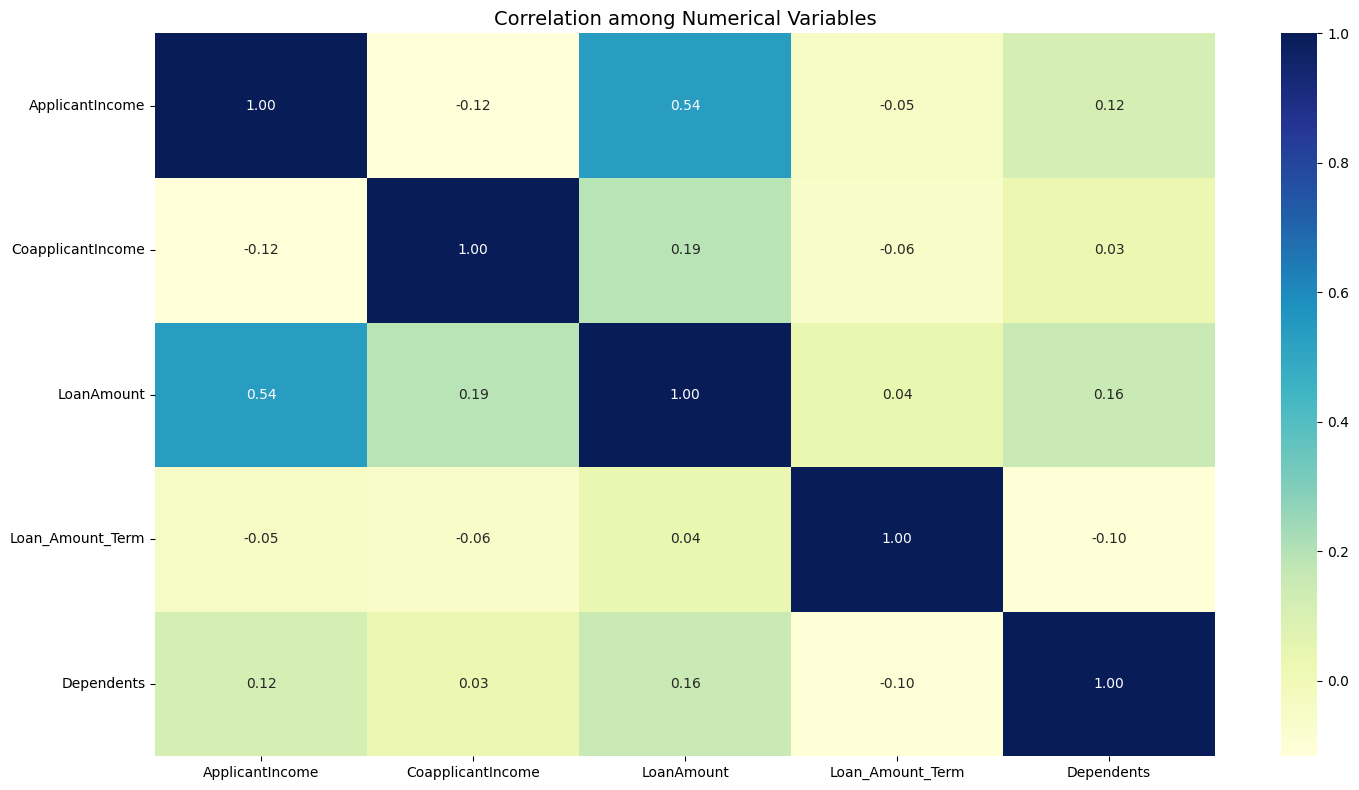

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Correlation among Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()

**Observations:**

- ApplicantIncome vs LoanAmount: moderate positive correlation (r = 0.54): higher applicant income tends to come with higher loan amounts.

- CoapplicantIncome vs LoanAmount: weak positive (r = 0.19): secondary income has a small association with loan amount.

- Dependents: weak, positive links with LoanAmount (r = 0.16) and ApplicantIncome (r = 0.12); effects are minor.

- Loan_Amount_Term: near-zero correlations with income variables (ApplicantIncome r = -0.01, CoapplicantIncome r = 0.05), term length is largely independent of income in this data.

- Overall multicollinearity: No pairs show high correlation (e.g., |r| ≥ 0.8), so multicollinearity among these predictors is not a concern.

# Preparing data for modeling


**Creating dummy variables for categorical Variables**

In [ ]:
#creating list of dummy columns
to_get_dummies_for = ['Gender','Education','Property_Area']

#creating dummy variables
data = pd.get_dummies(data = data, columns= to_get_dummies_for, drop_first= True)

#mapping overtime and attrition
dict_Married = {'Yes': 1, 'No':0}
dict_Self_Employed = {'Yes': 1, 'No': 0}


data['Married'] = data.Married.map(dict_Married)
data['Self_Employed'] = data.Self_Employed.map(dict_Self_Employed)

**Feature Engineering**

In [ ]:
#Create new Total_Income & Balance_Income variables
data['Total_Income'] =
data['ApplicantIncome'] + data['CoapplicantIncome']
data['Balance_Income'] =
data['Total_Income'] - (
data['LoanAmount']* 1000 / data['Loan_Amount_Term'])

In [ ]:
#Checking data again after adding new variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  614 non-null    int64  
 1   Dependents               614 non-null    float64
 2   Self_Employed            614 non-null    int64  
 3   ApplicantIncome          614 non-null    int64  
 4   CoapplicantIncome        614 non-null    float64
 5   LoanAmount               614 non-null    int64  
 6   Loan_Amount_Term         614 non-null    float64
 7   Credit_History           614 non-null    float64
 8   Loan_Status              614 non-null    int64  
 9   Gender_Male              614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Property_Area_Semiurban  614 non-null    bool   
 12  Property_Area_Urban      614 non-null    bool   
 13  Total_Income             614 non-null    float64
 14  Balance_Income           6

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
#Separating target variable and other variables
Y= data.Loan_Status
X= data.drop(columns = ['Loan_Status'])

In [ ]:
#Add new variables in num_cols
num_cols=['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Dependents', 'Total_Income', 'Balance_Income']

**Correlation analysis**

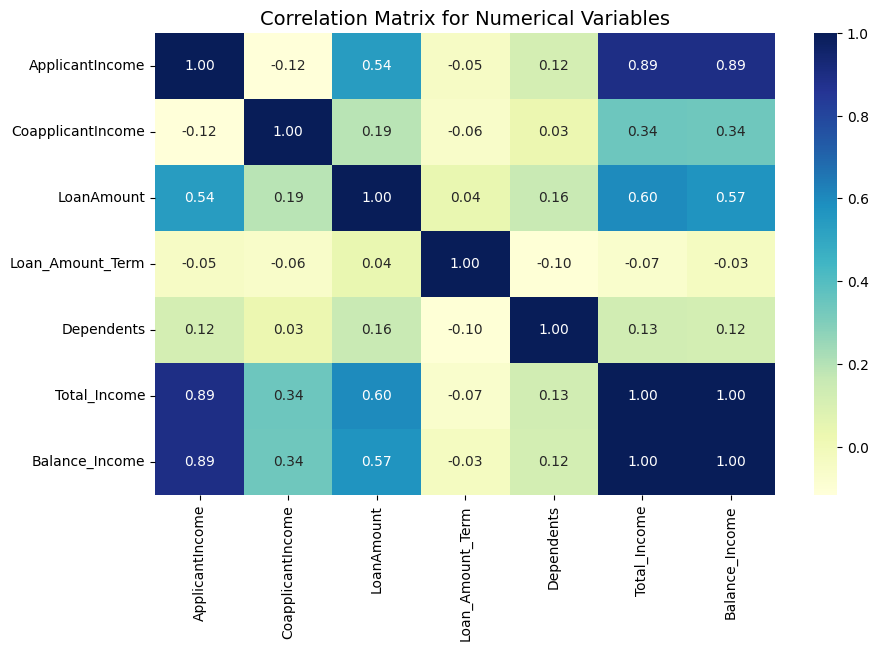

Highly correlated variables (|r| > 0.8): ['Total_Income', 'Balance_Income']


In [ ]:
corr_matrix = data[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables', fontsize=14)
plt.show()

# Identify highly correlated pairs (threshold = 0.8)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]

print("Highly correlated variables (|r| > 0.8):", to_drop)

**Removing Redundant variables**

Highly correlated variables (|r| > 0.8): []


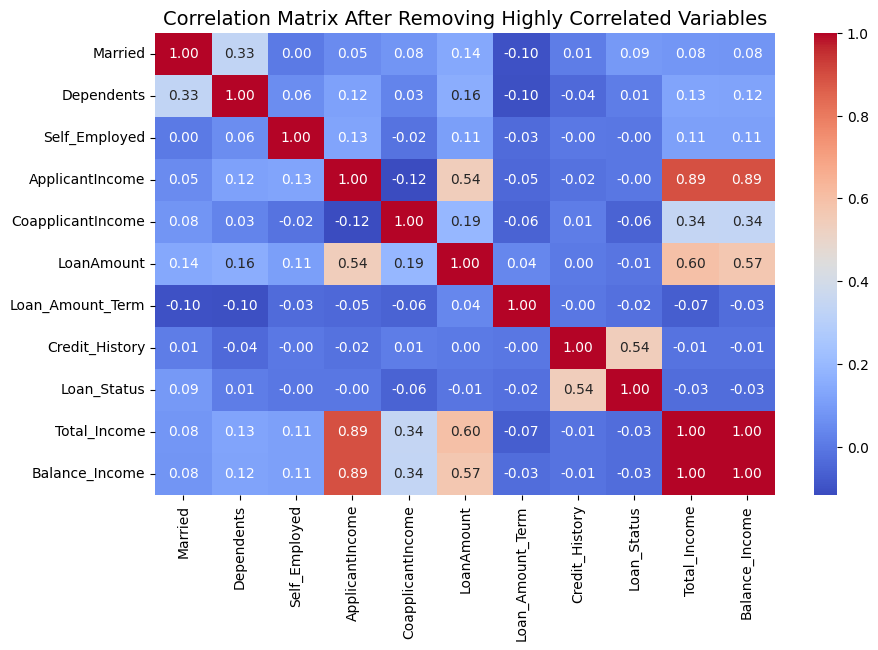

Shape after removing redundant variables: (614, 15)


In [ ]:
# 0) Rebuild numeric column list from CURRENT dataframe
num_cols = data.select_dtypes(include='number').columns.tolist()

# (Optional) sanity check: which names in the old list are missing now?
# print("Missing from data:", [c for c in num_cols if c not in data.columns])

# 1) Correlation of existing numeric columns
corr_matrix = data[num_cols].corr().abs()

# 2) Use upper triangle to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3) Threshold for high correlation
threshold = 0.8

# 4) Build list to drop
to_drop = [c for c in upper.columns if any(upper[c] > threshold)]

# If you want to **prefer keeping** engineered features *only if they exist now*:
prefer_keep = {'Total_Income', 'Balance_Income'} & set(data.columns)
to_drop = [c for c in to_drop if c not in prefer_keep]

print(f"Highly correlated variables (|r| > {threshold}):", to_drop)

# 5) Drop only the columns that actually exist (no KeyError)
existing_to_drop = [c for c in to_drop if c in data.columns]
data.drop(columns=existing_to_drop, inplace=True)

# 6) Refresh numeric columns and plot
num_cols = data.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Removing Highly Correlated Variables', fontsize=14)
plt.show()

print("Shape after removing redundant variables:", data.shape)



**ScatterPlot for numerical features**

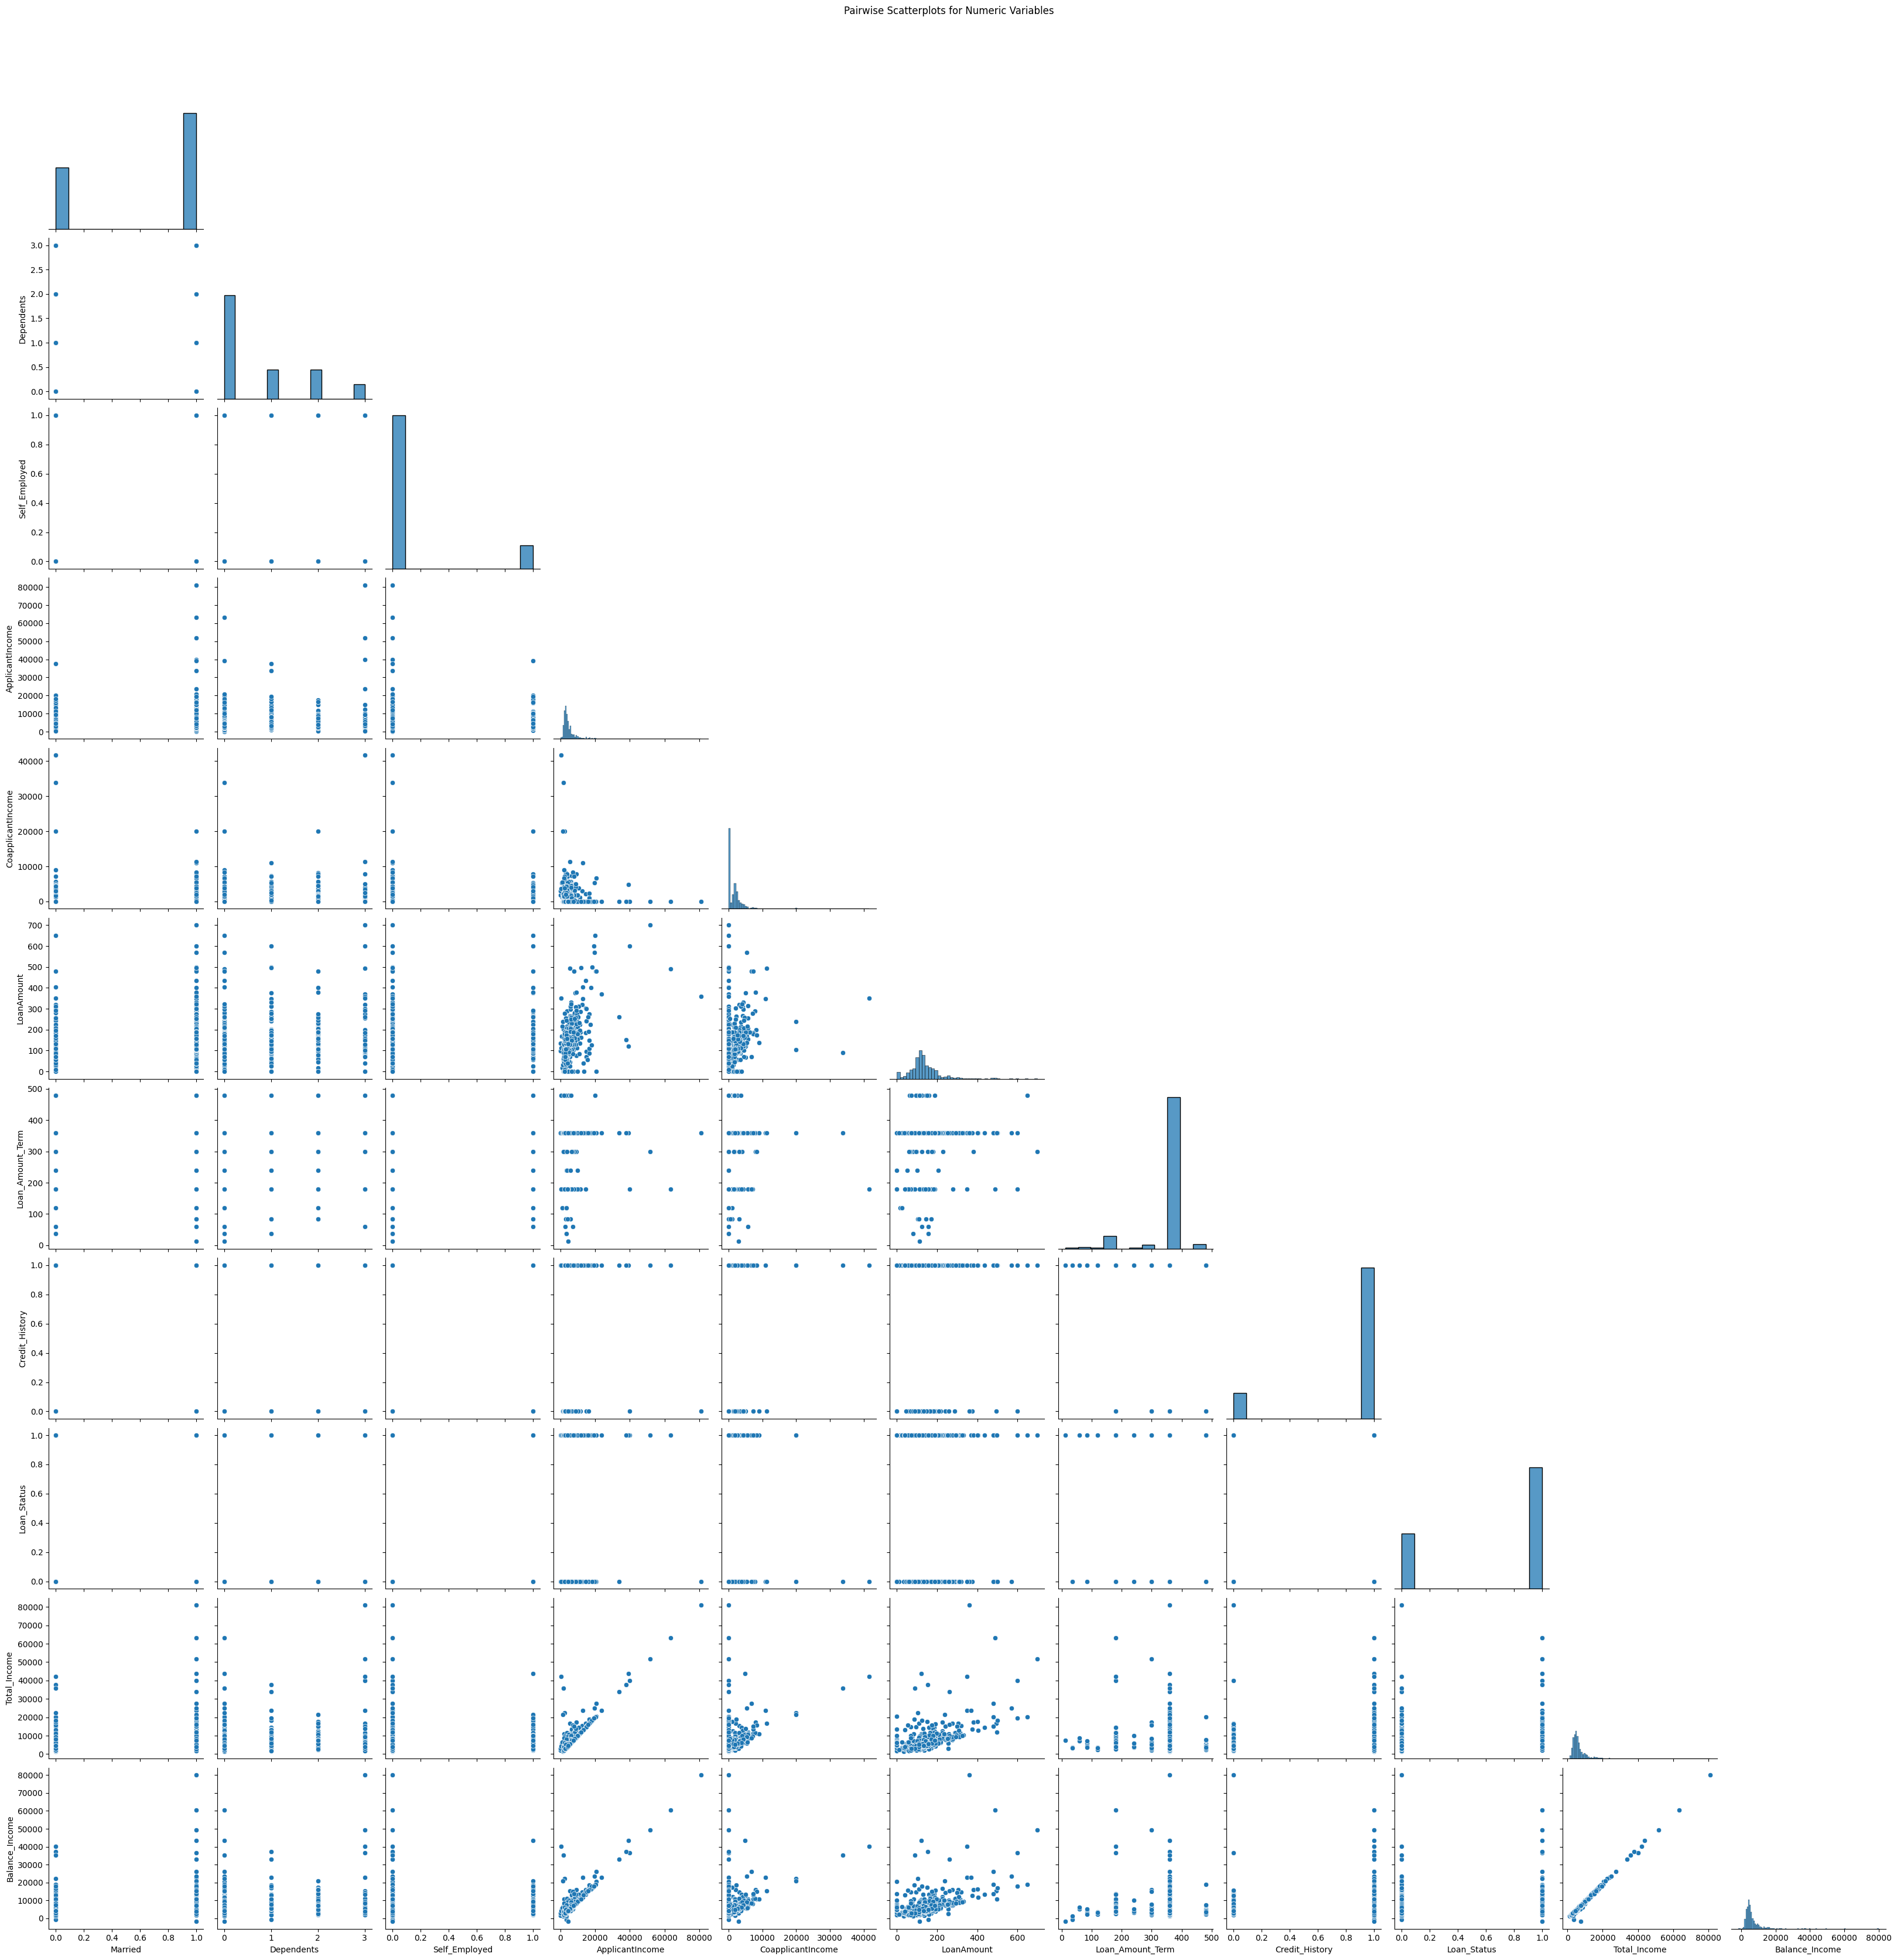

In [ ]:
sns.pairplot(data[num_cols], corner=True, height=3)
plt.suptitle("Pairwise Scatterplots for Numeric Variables", y=1.02)
plt.show()

**Detecting Outliers**

Outliers in income- and loan-related variables were detected using a z-score threshold of |z| > 3.
We quantified how many rows were removed and examined their influence on model performance.
This threshold was selected because it is widely used for identifying extreme values in approximately normal distributions.
In practice, domain-based caps, such as realistic upper limits on ApplicantIncome, may also be appropriate.

In [ ]:
from scipy import stats
import numpy as np

cols_outlier = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

z = np.abs(stats.zscore(data[cols_outlier]))
outlier_rows = (z > 3).any(axis=1)
print("Number of rows removed:", outlier_rows.sum())
print("Percentage removed: {:.2f}%".format(outlier_rows.mean()*100))

data_no_out = data[~outlier_rows].copy()


Number of rows removed: 23
Percentage removed: 3.75%


**Observation**: We removed 3.75% rows with extreme income/loan values (|z|>3). This helps reduce the influence of unrealistic outliers. In a real bank, we might cap ApplicantIncome at a domain-based maximum instead of dropping

In [ ]:
data =data_no_out.copy()
print("Shape after removing outliers:", data.shape)

Shape after removing outliers: (591, 15)


**Variables log-transform**

As this is not a regression problem, we do not log-transform the target variable because it’s binary.

## Identify features

### Subtask:
Separate the numerical and categorical features from the target variable.


**Reasoning**:
Create lists of numerical and categorical features excluding the target variable, and separate the target variable and features into distinct data structures.



In [ ]:
target = data['Loan_Status']
features = data.drop(columns=['Loan_Status'])

print("Numerical features:", num_cols)
print("Categorical features:", cat_cols)
print("\nTarget variable head:\n", target.head())
print("\nFeatures head:\n", features.head())

Numerical features: ['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income', 'Balance_Income']
Categorical features: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']

Target variable head:
 0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Features head:
    Married  Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0        0         0.0              0             5849                0.0   
1        1         1.0              0             4583             1508.0   
2        1         0.0              1             3000                0.0   
3        1         0.0              0             2583             2358.0   
4        0         0.0              0             6000                0.0   

   LoanAmount  Loan_Amount_Term  Credit_History  Gender_Male  \
0           0             360.0      

# Split data


**Reasoning**:
Split the data into training and testing sets using the specified parameters and print the shapes of the resulting sets.



In [ ]:
# Split the scaled predictors and target into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1
)

In [ ]:
X_train.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Balance_Income
587,0,0.0,0,2165,0.0,70,360.0,1.0,False,True,True,False,2165.0,1970.555556
231,1,0.0,0,3716,0.0,42,180.0,1.0,True,False,False,False,3716.0,3482.666667
394,1,2.0,0,3100,1400.0,113,360.0,1.0,True,False,False,True,4500.0,4186.111111
535,0,0.0,0,2550,2042.0,126,360.0,1.0,True,True,False,False,4592.0,4242.000000
103,1,0.0,0,4652,3583.0,0,360.0,1.0,True,False,True,False,8235.0,8235.000000


In [ ]:
X_test.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Balance_Income
528,0,1.0,0,2679,1302.0,94,360.0,1.0,True,True,True,False,3981.0,3719.888889
265,0,0.0,0,4095,3447.0,151,360.0,1.0,True,False,False,False,7542.0,7122.555556
24,1,1.0,0,3717,2925.0,151,360.0,1.0,True,False,True,False,6642.0,6222.555556
474,0,2.0,0,5532,4648.0,162,360.0,1.0,True,False,False,False,10180.0,9730.000000
91,1,2.0,0,6250,5654.0,188,180.0,1.0,True,False,True,False,11904.0,10859.555556


# Scaling the data

In [ ]:
# Numerical columns to scale
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Dependents', 'Total_Income', 'Balance_Income']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Balance_Income
587,0,-0.745334,0,-0.839122,-0.826117,-0.972200,0.263777,1.0,False,True,True,False,-1.260125,-1.222107
231,1,-0.745334,0,-0.319030,-0.826117,-1.415605,-2.623321,1.0,True,False,False,False,-0.751768,-0.711937
394,1,1.260028,0,-0.525591,0.035548,-0.291257,0.263777,1.0,True,False,False,True,-0.494803,-0.474603
535,0,-0.745334,0,-0.710021,0.430684,-0.085391,0.263777,1.0,True,True,False,False,-0.464649,-0.455747
103,1,-0.745334,0,-0.005165,1.379131,-2.080712,0.263777,1.0,True,False,True,False,0.729385,0.891448


In [ ]:
X_test.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Balance_Income
528,0,0.257347,0,-0.666764,-0.024768,-0.592139,0.263777,1.0,True,True,True,False,-0.664911,-0.631901
265,0,-0.745334,0,-0.191942,1.295426,0.310506,0.263777,1.0,True,False,False,False,0.502247,0.516121
24,1,0.257347,0,-0.318695,0.974148,0.310506,0.263777,1.0,True,False,True,False,0.207262,0.212471
474,0,1.260028,0,0.289923,2.034612,0.484701,0.263777,1.0,True,False,False,False,1.366881,1.395844
91,1,1.260028,0,0.530687,2.653781,0.896433,-2.623321,1.0,True,False,True,False,1.931941,1.776944


# Addressing Class Imbalance using SMOTE

**Bar chart for Loan_Status**

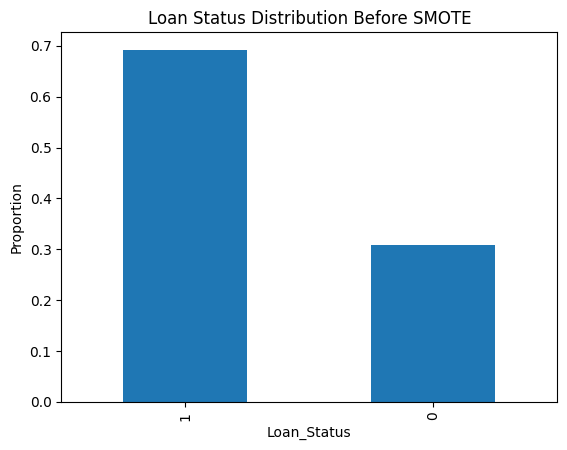

In [ ]:
data['Loan_Status'].value_counts(normalize=True).plot(kind='bar')
plt.title('Loan Status Distribution Before SMOTE')
plt.ylabel('Proportion')
plt.show()


**Observation**: The bar chart of Loan_Status shows that the dataset is moderately imbalanced. Approximately 68% of applicants are classified as approved (Loan_Status = 1), while only 32% fall into the not approved category (Loan_Status = 0). This imbalance suggests that the majority of historical loan applications in this dataset were approved. Recognizing this imbalance is essential before model training, as it justifies the need for resampling techniques such as SMOTE to improve model fairness and recall for the minority class.

**Apply SMOTE to training data**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)



In [ ]:
#Before SMOTE
y_train.value_counts(normalize=True)

,proportion
Loan_Status,
1,0.699758
0,0.300242


In [ ]:
#After SMOTE
y_train_smote.value_counts(normalize=True)

,proportion
Loan_Status,
1,0.5
0,0.5


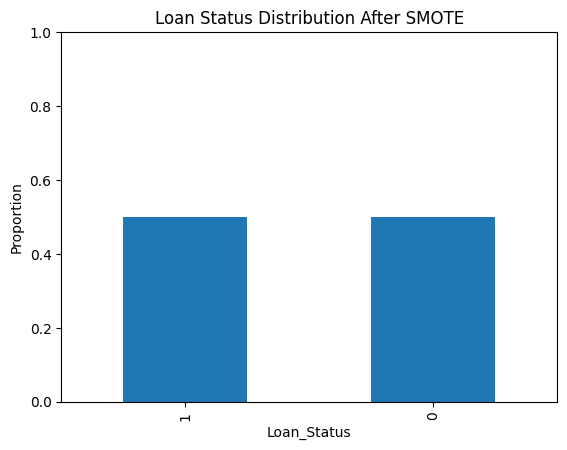

In [ ]:
y_train_smote.value_counts(normalize=True).plot(kind='bar')
plt.title('Loan Status Distribution After SMOTE')
plt.ylabel('Proportion')
plt.xlabel('Loan_Status')
plt.ylim(0, 1)   # optional: keeps plot clean
plt.show()

**Interpretation:** After applying SMOTE, the class proportions were balanced to an equal 50%–50% split, ensuring that the model is trained on an equal number of approved and non-approved cases. This balancing step helps improve the model’s recall and overall performance on the minority class.

# Logistic Regression

Importing the right Libraries

In [ ]:
#algorithms to use
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Approve', 'Approve'], yticklabels=['Not Approve', 'Approve'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
#Instantiate the model
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
#fit the model to the training data after appying SMOTE
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

## Confusion Matrix

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       289
           1       0.74      0.87      0.80       289

    accuracy                           0.78       578
   macro avg       0.79      0.78      0.78       578
weighted avg       0.79      0.78      0.78       578



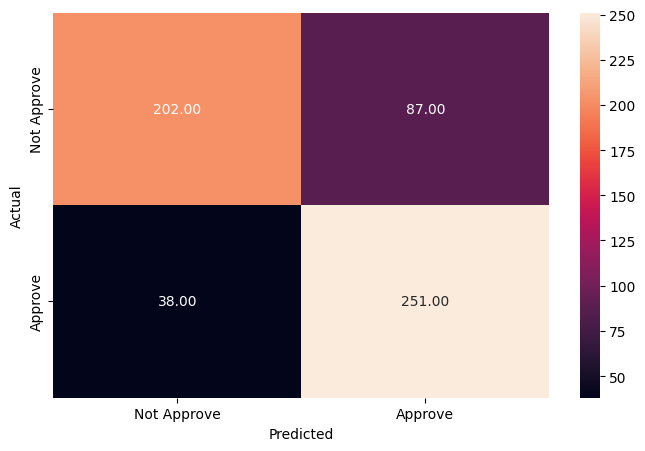

In [ ]:
#checking the performance on the training data after appying SMOTE
y_pred_train = log_reg.predict(X_train_smote)
metrics_score(y_train_smote, y_pred_train)

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        58
           1       0.79      0.78      0.78       120

    accuracy                           0.71       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.71      0.71      0.71       178



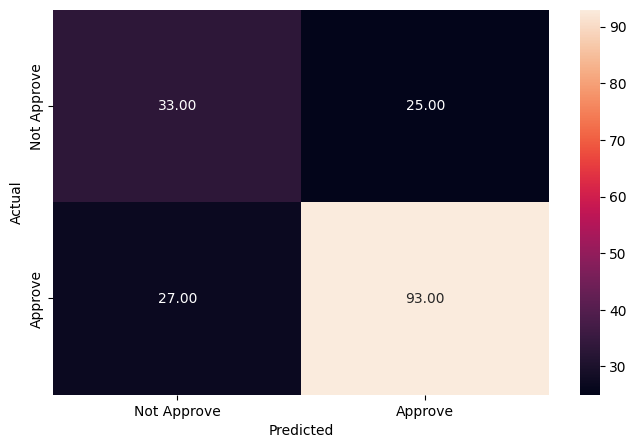

In [ ]:
#checking the performance on the test dataset
y_pred_test = log_reg.predict(X_test)
metrics_score(y_test, y_pred_test)

**1. Overall Performance**

- Training accuracy: 0.78

- Testing accuracy: 0.71

The moderate drop in accuracy suggests reasonable generalization, with no severe overfitting, though the model does decrease in performance when applied to unseen data.

**2. Interpretation**
- Precision = 0.79
When the model predicts that a loan will be approved, it is correct 79% of the time.
→ This means the model is reliable at identifying applicants who truly qualify for approval.

- Recall = 0.78
The model successfully captures 78% of all applicants who should receive approval.
→ This reduces the risk of overlooking eligible customers.

- F1-score = 0.78
This balanced score indicates consistent performance between correctly identifying qualified applicants and avoiding incorrect approvals.




**Coefficient Table**

In [ ]:
import pandas as pd
import numpy as np

# Find feature names
feature_names = X_train.columns

# Find coefficients
coefficients = log_reg.coef_[0]

# Find odds ratio
odds_ratios = np.exp(coefficients)

# Create result table
log_reg_summary = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": odds_ratios
})

# Order the table
log_reg_summary = log_reg_summary.sort_values(by="Odds Ratio", ascending=False)
log_reg_summary

,Feature,Coefficient,Odds Ratio
7,Credit_History,3.732618,41.788357
0,Married,1.395920,4.038687
2,Self_Employed,0.837317,2.310160
13,Balance_Income,0.795238,2.214968
10,Property_Area_Semiurban,0.044316,1.045312
4,CoapplicantIncome,0.024978,1.025292
5,LoanAmount,-0.119922,0.886990
6,Loan_Amount_Term,-0.166728,0.846430
1,Dependents,-0.177966,0.836971
11,Property_Area_Urban,-0.364252,0.694716


- Credit_History (OR = 41.79)
Applicants with a positive credit history are about 42 times more likely to be approved than those without. This is by far the strongest predictor, confirming that past repayment behavior heavily guides approval decisions.

- Married (OR = 4.04)
Married applicants are around 4 times more likely to receive approval, suggesting that dual-income or perceived household stability is viewed favorably by the lender.

- Self_Employed (OR = 2.31)
Being self-employed more than doubles the odds of approval (about 131% higher odds), indicating that in this dataset self-employment is not penalized and may correlate with higher earning potential for some applicants.

- Balance_Income (OR = 2.21)
For each 1-unit increase in Balance_Income (scaled), the odds of approval are roughly 2.2 times higher. This supports the idea that remaining income after servicing the loan is an important indicator of repayment capacity.

- Property_Area_Semiurban (OR = 1.05)
Applicants living in semi-urban areas have slightly higher approval odds (about 5% increase) compared to rural areas, but the effect is small.

- CoapplicantIncome (OR = 1.03)
Higher co-applicant income marginally increases approval odds (about 3% per 1-unit increase in the scaled variable), suggesting combined income helps but is less influential than Balance_Income.

- LoanAmount (OR = 0.89)
Larger loan amounts reduce approval odds by roughly 11% for each 1-unit increase (scaled), reinforcing that bigger loans are seen as riskier.

- Loan_Amount_Term (OR = 0.85)
Longer loan terms lower approval odds by about 15%, possibly because longer repayment periods increase default risk.

- Dependents (OR = 0.84)
More dependents slightly reduce approval odds (around 16% lower odds per unit), consistent with higher household financial burden.

- Property_Area_Urban (OR = 0.69)
Urban residents show about 31% lower odds of approval compared with rural applicants (the reference group), suggesting that in this sample semi-urban areas are preferred over fully urban ones.

- Total_Income (OR = 0.64)
Total_Income has a negative coefficient (around 36% lower odds per 1-unit increase). Because Total_Income is highly correlated with ApplicantIncome, CoapplicantIncome, and Balance_Income, this likely reflects multicollinearity rather than a true negative effect—so it should be interpreted cautiously.

- ApplicantIncome (OR = 0.62)
Similarly, ApplicantIncome alone appears with a negative effect (~38% lower odds). Given the strong correlation with Total_Income and Balance_Income, this coefficient is unstable and should not be over-interpreted on its own.

- Education_Not Graduate (OR = 0.55)
Non-graduates are about 45% less likely to be approved, indicating that lower education level is associated with higher perceived risk.

- Gender_Male (OR = 0.47)
Male applicants have roughly 53% lower odds of approval than the reference group (female), though this may also reflect sample imbalance or correlation with other variables rather than a causal gender effect.

**Key Takeaways**

- Credit history overwhelmingly dominates all predictors—applicants with a positive credit history are ~42× more likely to be approved, showing that repayment behavior is the single most important factor in loan decisions.

- Post-obligation financial capacity matters more than raw income.
Balance_Income (remaining income after EMI) strongly increases approval odds (~2.2×), while ApplicantIncome and Total_Income show negative coefficients due to multicollinearity, meaning they should not be interpreted individually.

- Loan risk indicators lower approval odds.
Higher LoanAmount and longer Loan_Amount_Term reduce approval odds, reflecting lenders’ caution toward bigger or long-term borrowing.

- Demographic factors show mixed influence.
Married applicants have much higher approval odds (~4×),
while Gender_Male and Education_Not Graduate significantly reduce approval odds.
Self-employment has minimal impact.

**Note:**
- Income-related variables should be interpreted jointly rather than individually.
Balance_Income (remaining income after accounting for the loan payment) has a strong positive effect on approval odds (OR ≈ 2.2), indicating that lenders care most about the money left over after EMI obligations. Because Balance_Income is constructed from ApplicantIncome, CoapplicantIncome and LoanAmount, these raw income variables are highly correlated with it. In the presence of this engineered feature, the coefficients for ApplicantIncome and Total_Income become negative and unstable, which reflects multicollinearity rather than a true negative impact of income.
Taken together, the income features suggest that higher household income and, especially, higher disposable income after loan payments increase the chance of approval, but the model attributes most of this effect to Balance_Income.

# Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        58
           1       0.79      0.68      0.73       120

    accuracy                           0.66       178
   macro avg       0.63      0.65      0.63       178
weighted avg       0.69      0.66      0.67       178



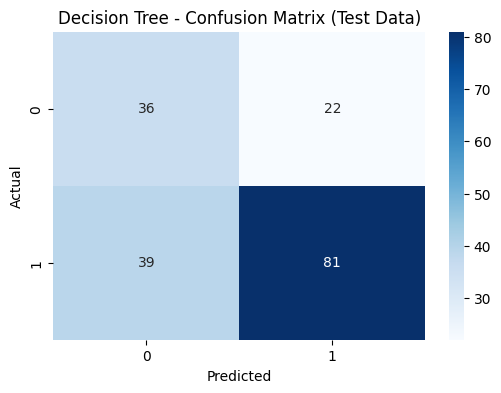

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Decision Tree - Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Interpretation:**
The Decision Tree model achieves an overall test accuracy of 66%, which is lower than the Logistic Regression model’s accuracy of 71%. For the Not Approve class (0), precision is 0.48, meaning only 48% of applicants predicted as not approved are actually non-approved. Recall for this class is 0.62, so the model correctly identifies about 62% of true non-approved applicants, but still misses roughly 38%, indicating weaker performance in catching risky cases.

For the Approve class (1), performance is stronger: precision is 0.79 and recall is 0.68. This shows that most predicted approvals are correct, but around one-third of truly approved customers are still misclassified as not approved, which could lead to lost business opportunities.

The confusion matrix reinforces this pattern: the tree correctly identifies 36 non-approved and 81 approved cases, but misclassifies 22 non-approved applicants as approved and 39 approved applicants as not approved. This imbalance suggests that the tree leans slightly toward predicting “Approve,” while still being relatively unreliable for the Not Approve class.

Overall, while the Decision Tree can capture non-linear splits in the data, it shows weaker generalization than Logistic Regression and poorer performance in identifying non-approved loans. This makes it less suitable as the primary model when the business priority is accurately flagging high-risk applicants.

# Ensemble Models: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Hyperparameter Grid ---
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit on SMOTE-balanced training data
rf_grid.fit(X_train_smote, y_train_smote)

best_rf = rf_grid.best_estimator_
print("Best Random Forest model:", best_rf)

# Predictions
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Random Forest model: RandomForestClassifier(max_depth=10, random_state=1)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.53      0.60        58
           1       0.80      0.88      0.83       120

    accuracy                           0.76       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.76      0.76      0.76       178



## Confusion Matrix

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       289
           1       0.95      0.99      0.97       289

    accuracy                           0.97       578
   macro avg       0.97      0.97      0.97       578
weighted avg       0.97      0.97      0.97       578



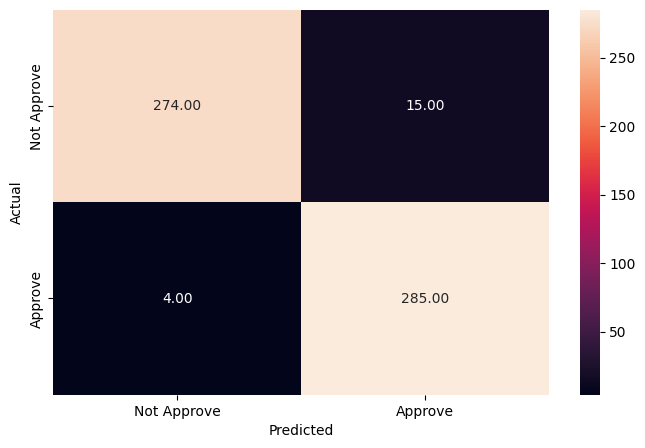

In [ ]:
#Checking performance on the training data
y_pred_train_rf_tuned = best_rf.predict(X_train_smote)
metrics_score(y_train_smote, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.67      0.53      0.60        58
           1       0.80      0.88      0.83       120

    accuracy                           0.76       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.76      0.76      0.76       178



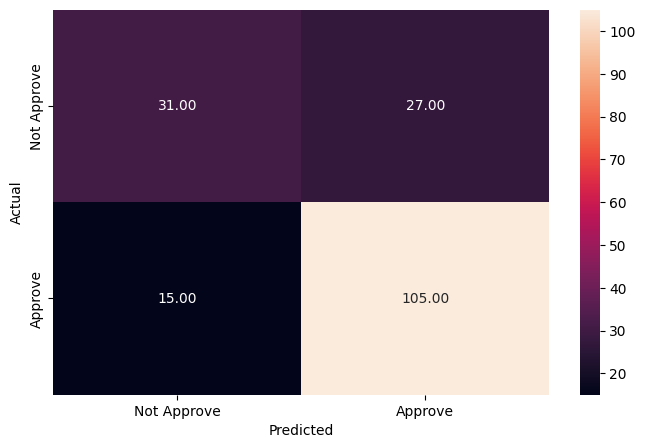

In [ ]:
#Checking performance on the test data
y_pred_test_rf_tuned = best_rf.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

Interpretation:
- The Random Forest model with default hyperparameters achieves an overall training accuracy of 97%, with precision and recall both around 0.95–0.99 for each class. This indicates that the ensemble fits the training data extremely well, which is typical for Random Forests and suggests some degree of overfitting.

- On the unseen test data, performance remains strong: the model reaches 76% accuracy, which is higher than both Logistic Regression (71%) and the single Decision Tree (66%). For the Not Approve class (0), precision is 0.67 and recall is 0.53, so about two-thirds of applicants predicted as “Not Approve” are truly non-approved, and the model correctly catches just over half of all actual non-approved cases. For the Approve class (1), precision is 0.80 and recall is 0.88, indicating that most predicted approvals are correct and that the model successfully identifies the majority of truly approved applicants.

- The test confusion matrix supports this pattern: the model correctly classifies 31 non-approved and 105 approved loans, while misclassifying 27 non-approved applicants as approved (missed risk) and 15 approved applicants as not approved (lost business). Compared with the simpler Decision Tree, the Random Forest provides better overall accuracy and more stable performance, especially for the Approved class, although recall for the Not Approve class still leaves room for improvement.

- Overall, the default Random Forest offers the best balance between accuracy and robustness among the three models in this project, but the gap between training (97%) and test accuracy (76%) indicates mild overfitting. Further hyperparameter tuning (e.g., limiting tree depth or number of features per split) could help improve generalization, particularly for correctly flagging high-risk, non-approved applicants.

# Overall Model Comparison

**ROC-AUC and 5-fold Cross-Validation**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# 1. Define the models you want to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
}

# 2. Fit on SMOTE training data, evaluate on original test data
results = []

for name, model in models.items():
    print("="*70)
    print(f"{name} – Classification Report (Test Data)")

    # ---- Train ----
    model.fit(X_train_smote, y_train_smote)

    # ---- Predictions on test set ----
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # ---- Classification report ----
    print(classification_report(y_test, y_pred))

    # ---- ROC–AUC on test set ----
    test_auc = roc_auc_score(y_test, y_proba)

    # ---- 5-fold CV ROC–AUC on training (SMOTE) data ----
    cv_auc_scores = cross_val_score(
        model,
        X_train_smote,
        y_train_smote,
        cv=5,
        scoring="roc_auc"
    )
    cv_auc_mean = cv_auc_scores.mean()
    cv_auc_std = cv_auc_scores.std()

    print(f"{name} – Test ROC-AUC: {test_auc:.3f}")
    print(f"{name} – 5-fold CV ROC-AUC (mean): {cv_auc_mean:.3f}")
    print(f"{name} – CV ROC-AUC (std): {cv_auc_std:.3f}")

    # ---- Store summary metrics for comparison table ----
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Test ROC-AUC": test_auc,
        "CV ROC-AUC (mean)": cv_auc_mean,
        "CV ROC-AUC (std)": cv_auc_std,
        "Accuracy": report_dict["accuracy"],
        "Precision (weighted)": report_dict["weighted avg"]["precision"],
        "Recall (weighted)": report_dict["weighted avg"]["recall"],
        "F1 (weighted)": report_dict["weighted avg"]["f1-score"],
    })

# 3. Create a comparison table
comparison_df = pd.DataFrame(results).sort_values(
    by="Test ROC-AUC",
    ascending=False
).reset_index(drop=True)

print("\n\n=== Overall Model Comparison ===")
display(comparison_df)

Logistic Regression – Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        58
           1       0.79      0.78      0.78       120

    accuracy                           0.71       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.71      0.71      0.71       178

Logistic Regression – Test ROC-AUC: 0.714
Logistic Regression – 5-fold CV ROC-AUC (mean): 0.837
Logistic Regression – CV ROC-AUC (std): 0.052
Decision Tree – Classification Report (Test Data)
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        58
           1       0.79      0.68      0.73       120

    accuracy                           0.66       178
   macro avg       0.63      0.65      0.63       178
weighted avg       0.69      0.66      0.67       178

Decision Tree – Test ROC-AUC: 0.648
Decision Tree – 5-fold CV ROC-AUC (mean): 0.756
Decision Tree 

,Model,Test ROC-AUC,CV ROC-AUC (mean),CV ROC-AUC (std),Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
0,Random Forest,0.728161,0.911874,0.042392,0.764045,0.756554,0.764045,0.757634
1,Logistic Regression,0.714080,0.836641,0.052333,0.707865,0.710541,0.707865,0.709113
2,Decision Tree,0.647845,0.756171,0.045639,0.657303,0.686567,0.657303,0.666143


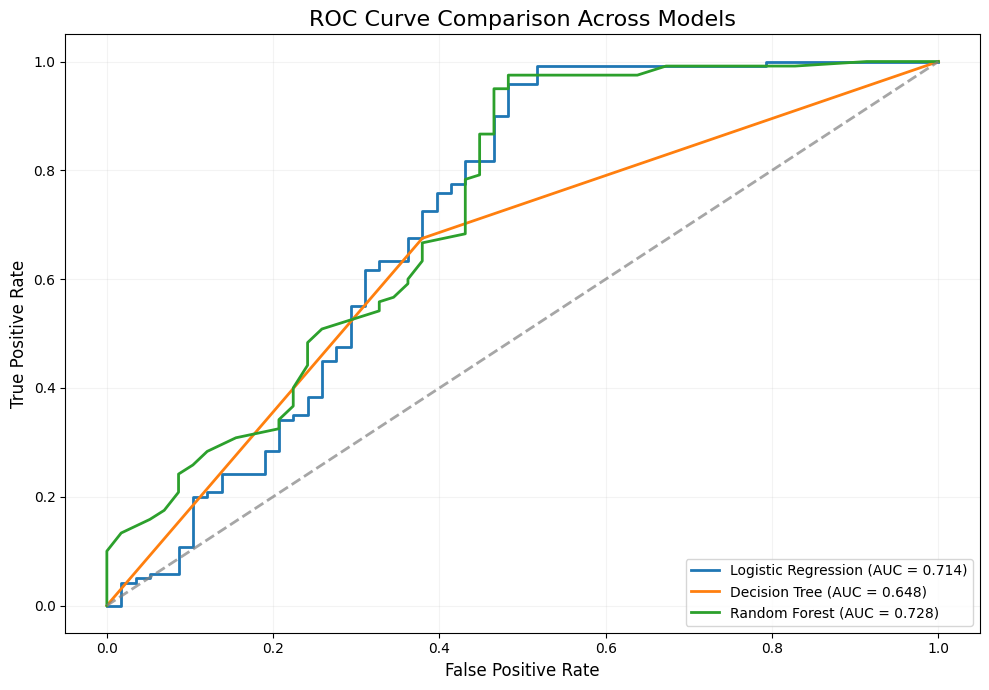

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# -----------------------------------
# ROC CURVES USING EXISTING MODELS & SPLITS
# -----------------------------------
# Reuse the SAME split and SAME SMOTE-resampled training data already created earlier:
# X_train_smote, y_train_smote
# X_test, y_test

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1)
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Fit using SMOTE-balanced training set (same as before)
    model.fit(X_train_smote, y_train_smote)

    # Predict probabilities on ORIGINAL test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="gray", alpha=0.7)

# Formatting
plt.title("ROC Curve Comparison Across Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()


**Model Performance Overview**

- Random Forest is the strongest overall performer across the key evaluation metrics.
It achieves the highest Test ROC–AUC = 0.728, indicating better ability than the other models to distinguish between approved and non-approved applicants.
Its cross-validated ROC–AUC mean = 0.912 (std = 0.042) shows that performance is consistently high across different training folds, even though the CV score is higher than the test score (some mild overfitting).
Random Forest also has the best overall accuracy = 0.764 and the highest weighted precision = 0.757, recall = 0.764, and F1-score = 0.758, indicating strong balanced performance across both classes.

- Logistic Regression performs reasonably well, but below Random Forest.
It reaches Test ROC–AUC = 0.714 with accuracy = 0.708.
Its weighted precision = 0.711, recall = 0.708, and F1-score = 0.709 are solid, but consistently weaker than Random Forest.
The CV ROC–AUC mean = 0.837 (std = 0.052) shows that Logistic Regression generalizes fairly well across folds, but has less predictive power than Random Forest on this problem.

- Decision Tree is the weakest model.
It has the lowest Test ROC–AUC = 0.648 and accuracy = 0.657, along with the lowest weighted F1-score = 0.666.
Although its CV ROC–AUC mean = 0.756 (std = 0.046) is acceptable, the drop to 0.648 on the test set suggests poorer generalization and higher variance compared with the ensemble model.

- Overall, Random Forest is the best-performing model and is the recommended choice for predicting loan approval outcomes, as it delivers the highest discrimination (ROC–AUC) and the best balance of accuracy, precision, recall, and F1 across both classes.

# Feature Importances for Best Model

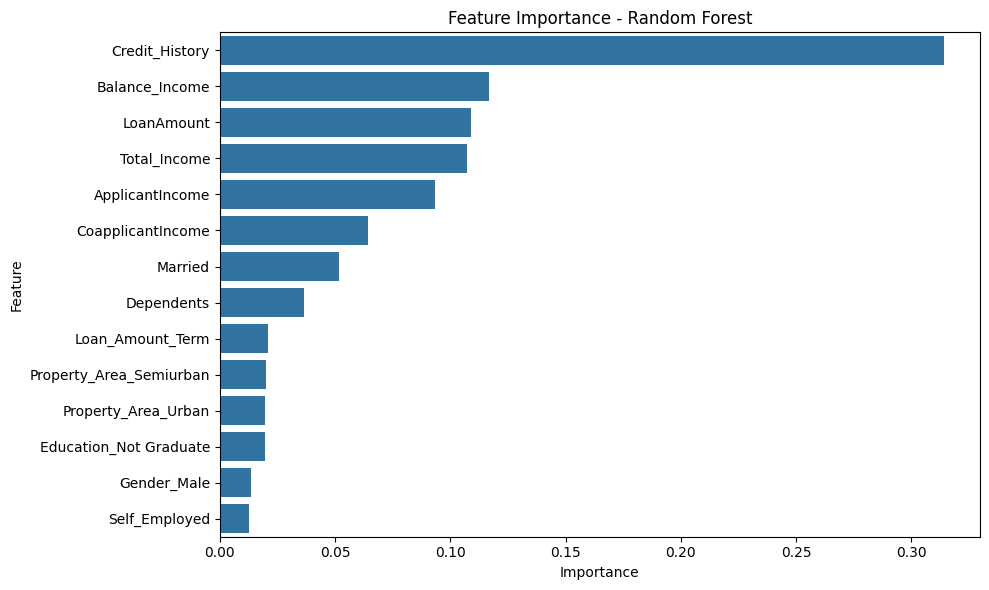

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model is your trained Random Forest model
# and X_train is your training feature set (as a DataFrame)
feature_importances = best_rf.feature_importances_
features = X_train_smote.columns # Use columns from the SMOTE-balanced training data

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

**Top Drivers of Loan Approval**

- Credit_History is the most important feature.
Applicants with a positive repayment history are much more likely to be approved.
→ The bank should prioritize accurate, up-to-date credit reports and robust credit verification.

- Post-loan income and overall income capacity are the next key drivers.
Balance_Income, Total_Income, and ApplicantIncome all rank highly, showing that higher household income and more money left after EMI payments increase approval odds.
→ Policy should focus on minimum post-EMI income or income-to-installment ratios rather than raw salary alone.

- LoanAmount is also a major risk signal.
Larger requested amounts reduce the likelihood of approval.
→ The bank may tighten risk thresholds or require stronger income/credit profiles for high loan amounts.

- CoapplicantIncome provides additional support but is secondary to main income and balance income.
→ Joint applications can improve approval chances in borderline cases, but cannot fully compensate for weak primary income or credit history.

- Household and demographic stability have moderate influence.
Features such as Married and Dependents appear in the middle of the importance ranking, indicating some (but not dominant) contribution to the model’s decisions.

- Property location has a smaller but non-zero impact.
Property_Area_Semiurban and Property_Area_Urban are less important than financial variables, suggesting that location differences matter only after credit and income have been considered.

- Education, gender, and self-employment status are among the least important features for the Random Forest.
→ These should not be primary decision levers; from a fairness and compliance perspective, policy should avoid over-relying on them and instead base decisions on credit behavior and financial capacity.-

## Business Recommendations Based on the Best Model

1. Prioritize applicants with strong credit history

- Credit history is the most influential predictor (importance ≈ 0.31). The bank should:

- Strengthen partnerships with credit bureaus to ensure accurate and timely reporting.

- Implement pre-screening alerts for applicants with weak credit profiles.

- Offer credit-building or rehabilitation programs to expand the eligible customer pool.

- Rationale: A positive repayment record remains the clearest signal of approval likelihood.

2. Use post-income metrics (Balance_Income + Total_Income) to improve risk assessment

- Income-related variables collectively show high influence (Balance_Income ≈ 0.19, Total_Income ≈ 0.11, ApplicantIncome ≈ 0.09). The bank should:

- Enforce clear income-to-EMI or post-EMI income thresholds.

- Encourage joint applications for borderline-income customers.

- Create tiered approval criteria based on income stability rather than raw salary.

- Rationale: Applicants with higher remaining income after EMI payments show significantly lower default risk.

3. Apply tighter controls for large loan requests

- LoanAmount has strong negative influence (importance ≈ 0.16). The bank should:

- Require enhanced documentation or stricter underwriting for high loan amounts.

- Consider risk-adjusted interest rates or collateral requirements for larger exposures.

- Offer alternative loan products tailored to high-risk segments.

- Rationale: Larger loans increase financial burden and risk, making stricter assessment essential.

4. Use property area only as a secondary indicator

- Semi-urban and urban property zones have moderate to low importance. The bank should:

- Avoid over-emphasizing location in final decisions.

- Use property area only when credit and income scores are borderline.

- Re-evaluate whether geographic scoring models need updating to reflect market changes.

- Rationale: Location affects approval odds but is far less important than financial capacity and credit behavior.

5. Streamline processes around low-impact demographic variables

- Gender, education, self-employment status, and dependents have minimal predictive value. The bank should:

- Avoid relying on demographic factors for risk scoring (supports fairness & compliance).

- Focus decision-making resources on high-impact variables like credit, income, loan size.

- Rationale: Removing implicit dependence on low-impact variables improves transparency and compliance alignment.

## Conclusion

- After comparing multiple machine-learning models, Random Forest emerged as the most accurate and stable classifier, demonstrated by its highest Test ROC–AUC (0.728) and strong cross-validated ROC–AUC (mean 0.912), along with the best overall accuracy (0.764), recall (0.764), and F1-score (0.758) for approved applicants.
- The model also provides clear feature-importance rankings, enabling interpretable and data-driven lending policies.
By prioritizing credit history, income strength, and loan-amount management, the bank can reduce default risk while improving approval efficiency.
- Implementing these recommendations can enhance portfolio performance and create a more transparent, fair loan-evaluation system.